In [2]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler

In [3]:
#importing the dataset

In [4]:
train_df=pd.read_csv("C:/Users/User/Desktop/train_FD001.txt",sep=" ")

In [5]:
train_df.head()

,1,1.1,-0.0007,-0.0004,100.0,518.67,641.82,1589.70,1400.60,14.62,...,8138.62,8.4195,0.03,392,2388,100.00,39.06,23.4190,Unnamed: 26,Unnamed: 27
0,1,2,0.0019,-0.0003,100.0,518.67,642.15,1591.82,1403.14,14.62,...,8131.49,8.4318,0.03,392,2388,100.0,39.00,23.4236,NaN,NaN
1,1,3,-0.0043,0.0003,100.0,518.67,642.35,1587.99,1404.20,14.62,...,8133.23,8.4178,0.03,390,2388,100.0,38.95,23.3442,NaN,NaN
2,1,4,0.0007,0.0000,100.0,518.67,642.35,1582.79,1401.87,14.62,...,8133.83,8.3682,0.03,392,2388,100.0,38.88,23.3739,NaN,NaN
3,1,5,-0.0019,-0.0002,100.0,518.67,642.37,1582.85,1406.22,14.62,...,8133.80,8.4294,0.03,393,2388,100.0,38.90,23.4044,NaN,NaN
4,1,6,-0.0043,-0.0001,100.0,518.67,642.10,1584.47,1398.37,14.62,...,8132.85,8.4108,0.03,391,2388,100.0,38.98,23.3669,NaN,NaN


In [6]:
train_df.shape

(20630, 28)

In [7]:
#initially dropping the last two columns since the columns consist full of null values

In [8]:
train_df.drop(columns=['Unnamed: 26','Unnamed: 27'],inplace=True)

In [9]:
train_df.head(5)

,1,1.1,-0.0007,-0.0004,100.0,518.67,641.82,1589.70,1400.60,14.62,...,521.66,2388.02,8138.62,8.4195,0.03,392,2388,100.00,39.06,23.4190
0,1,2,0.0019,-0.0003,100.0,518.67,642.15,1591.82,1403.14,14.62,...,522.28,2388.07,8131.49,8.4318,0.03,392,2388,100.0,39.00,23.4236
1,1,3,-0.0043,0.0003,100.0,518.67,642.35,1587.99,1404.20,14.62,...,522.42,2388.03,8133.23,8.4178,0.03,390,2388,100.0,38.95,23.3442
2,1,4,0.0007,0.0000,100.0,518.67,642.35,1582.79,1401.87,14.62,...,522.86,2388.08,8133.83,8.3682,0.03,392,2388,100.0,38.88,23.3739
3,1,5,-0.0019,-0.0002,100.0,518.67,642.37,1582.85,1406.22,14.62,...,522.19,2388.04,8133.80,8.4294,0.03,393,2388,100.0,38.90,23.4044
4,1,6,-0.0043,-0.0001,100.0,518.67,642.10,1584.47,1398.37,14.62,...,521.68,2388.03,8132.85,8.4108,0.03,391,2388,100.0,38.98,23.3669


In [10]:
# Renaming the columns

In [11]:
index_col_names=['unit_id','time_cycle']
operat_set_col_names=['oper_set{}'.format(i) for i in range(1,4)]
sensor_measure_col_names=['sm_{}'.format(i) for i in range(1,22)]
all_col=index_col_names+operat_set_col_names+sensor_measure_col_names
print(all_col)

['unit_id', 'time_cycle', 'oper_set1', 'oper_set2', 'oper_set3', 'sm_1', 'sm_2', 'sm_3', 'sm_4', 'sm_5', 'sm_6', 'sm_7', 'sm_8', 'sm_9', 'sm_10', 'sm_11', 'sm_12', 'sm_13', 'sm_14', 'sm_15', 'sm_16', 'sm_17', 'sm_18', 'sm_19', 'sm_20', 'sm_21']


In [12]:
train_df.columns=all_col

In [13]:
train_df.head(5)

,unit_id,time_cycle,oper_set1,oper_set2,oper_set3,sm_1,sm_2,sm_3,sm_4,sm_5,...,sm_12,sm_13,sm_14,sm_15,sm_16,sm_17,sm_18,sm_19,sm_20,sm_21
0,1,2,0.0019,-0.0003,100.0,518.67,642.15,1591.82,1403.14,14.62,...,522.28,2388.07,8131.49,8.4318,0.03,392,2388,100.0,39.00,23.4236
1,1,3,-0.0043,0.0003,100.0,518.67,642.35,1587.99,1404.20,14.62,...,522.42,2388.03,8133.23,8.4178,0.03,390,2388,100.0,38.95,23.3442
2,1,4,0.0007,0.0000,100.0,518.67,642.35,1582.79,1401.87,14.62,...,522.86,2388.08,8133.83,8.3682,0.03,392,2388,100.0,38.88,23.3739
3,1,5,-0.0019,-0.0002,100.0,518.67,642.37,1582.85,1406.22,14.62,...,522.19,2388.04,8133.80,8.4294,0.03,393,2388,100.0,38.90,23.4044
4,1,6,-0.0043,-0.0001,100.0,518.67,642.10,1584.47,1398.37,14.62,...,521.68,2388.03,8132.85,8.4108,0.03,391,2388,100.0,38.98,23.3669


In [14]:
# the rows with unit_id=1 represents a particular engine till its degradation.
#The last time_cycle in each engine represents the failure point

In [15]:
train_df.dtypes

unit_id         int64
time_cycle      int64
oper_set1     float64
oper_set2     float64
oper_set3     float64
sm_1          float64
sm_2          float64
sm_3          float64
sm_4          float64
sm_5          float64
sm_6          float64
sm_7          float64
sm_8          float64
sm_9          float64
sm_10         float64
sm_11         float64
sm_12         float64
sm_13         float64
sm_14         float64
sm_15         float64
sm_16         float64
sm_17           int64
sm_18           int64
sm_19         float64
sm_20         float64
sm_21         float64
dtype: object

In [16]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20630 entries, 0 to 20629
Data columns (total 26 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   unit_id     20630 non-null  int64  
 1   time_cycle  20630 non-null  int64  
 2   oper_set1   20630 non-null  float64
 3   oper_set2   20630 non-null  float64
 4   oper_set3   20630 non-null  float64
 5   sm_1        20630 non-null  float64
 6   sm_2        20630 non-null  float64
 7   sm_3        20630 non-null  float64
 8   sm_4        20630 non-null  float64
 9   sm_5        20630 non-null  float64
 10  sm_6        20630 non-null  float64
 11  sm_7        20630 non-null  float64
 12  sm_8        20630 non-null  float64
 13  sm_9        20630 non-null  float64
 14  sm_10       20630 non-null  float64
 15  sm_11       20630 non-null  float64
 16  sm_12       20630 non-null  float64
 17  sm_13       20630 non-null  float64
 18  sm_14       20630 non-null  float64
 19  sm_15       20630 non-nul

In [17]:
train_df.isnull().sum()

unit_id       0
time_cycle    0
oper_set1     0
oper_set2     0
oper_set3     0
sm_1          0
sm_2          0
sm_3          0
sm_4          0
sm_5          0
sm_6          0
sm_7          0
sm_8          0
sm_9          0
sm_10         0
sm_11         0
sm_12         0
sm_13         0
sm_14         0
sm_15         0
sm_16         0
sm_17         0
sm_18         0
sm_19         0
sm_20         0
sm_21         0
dtype: int64

In [18]:
train_df.nunique()

unit_id        100
time_cycle     362
oper_set1      158
oper_set2       13
oper_set3        1
sm_1             1
sm_2           310
sm_3          3012
sm_4          4051
sm_5             1
sm_6             2
sm_7           513
sm_8            53
sm_9          6403
sm_10            1
sm_11          159
sm_12          427
sm_13           56
sm_14         6078
sm_15         1918
sm_16            1
sm_17           13
sm_18            1
sm_19            1
sm_20          120
sm_21         4745
dtype: int64

In [19]:
train_df[train_df.unit_id==1]

,unit_id,time_cycle,oper_set1,oper_set2,oper_set3,sm_1,sm_2,sm_3,sm_4,sm_5,...,sm_12,sm_13,sm_14,sm_15,sm_16,sm_17,sm_18,sm_19,sm_20,sm_21
0,1,2,0.0019,-0.0003,100.0,518.67,642.15,1591.82,1403.14,14.62,...,522.28,2388.07,8131.49,8.4318,0.03,392,2388,100.0,39.00,23.4236
1,1,3,-0.0043,0.0003,100.0,518.67,642.35,1587.99,1404.20,14.62,...,522.42,2388.03,8133.23,8.4178,0.03,390,2388,100.0,38.95,23.3442
2,1,4,0.0007,0.0000,100.0,518.67,642.35,1582.79,1401.87,14.62,...,522.86,2388.08,8133.83,8.3682,0.03,392,2388,100.0,38.88,23.3739
3,1,5,-0.0019,-0.0002,100.0,518.67,642.37,1582.85,1406.22,14.62,...,522.19,2388.04,8133.80,8.4294,0.03,393,2388,100.0,38.90,23.4044
4,1,6,-0.0043,-0.0001,100.0,518.67,642.10,1584.47,1398.37,14.62,...,521.68,2388.03,8132.85,8.4108,0.03,391,2388,100.0,38.98,23.3669
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
186,1,188,-0.0067,0.0003,100.0,518.67,643.75,1602.38,1422.78,14.62,...,519.79,2388.23,8117.69,8.5207,0.03,396,2388,100.0,38.51,22.9588
187,1,189,-0.0006,0.0002,100.0,518.67,644.18,1596.17,1428.01,14.62,...,519.58,2388.33,8117.51,8.5183,0.03,395,2388,100.0,38.48,23.1127
188,1,190,-0.0027,0.0001,100.0,518.67,643.64,1599.22,1425.95,14.62,...,520.04,2388.35,8112.58,8.5223,0.03,398,2388,100.0,38.49,23.0675
189,1,191,-0.0000,-0.0004,100.0,518.67,643.34,1602.36,1425.77,14.62,...,519.57,2388.30,8114.61,8.5174,0.03,394,2388,100.0,38.45,23.1295


In [20]:
# hence there are 100 engines in total in all the training set and engine with unit_id =1 fails at time_cycle 192.

In [21]:
#after homany cycles does each engine fail?
num_cycles_to_failure = train_df.groupby('unit_id')['time_cycle'].count()
num_cycles_to_failure[:10]

unit_id
1     191
2     287
3     179
4     189
5     269
6     188
7     259
8     150
9     201
10    222
Name: time_cycle, dtype: int64

In [22]:
# Boxplots of sensor data

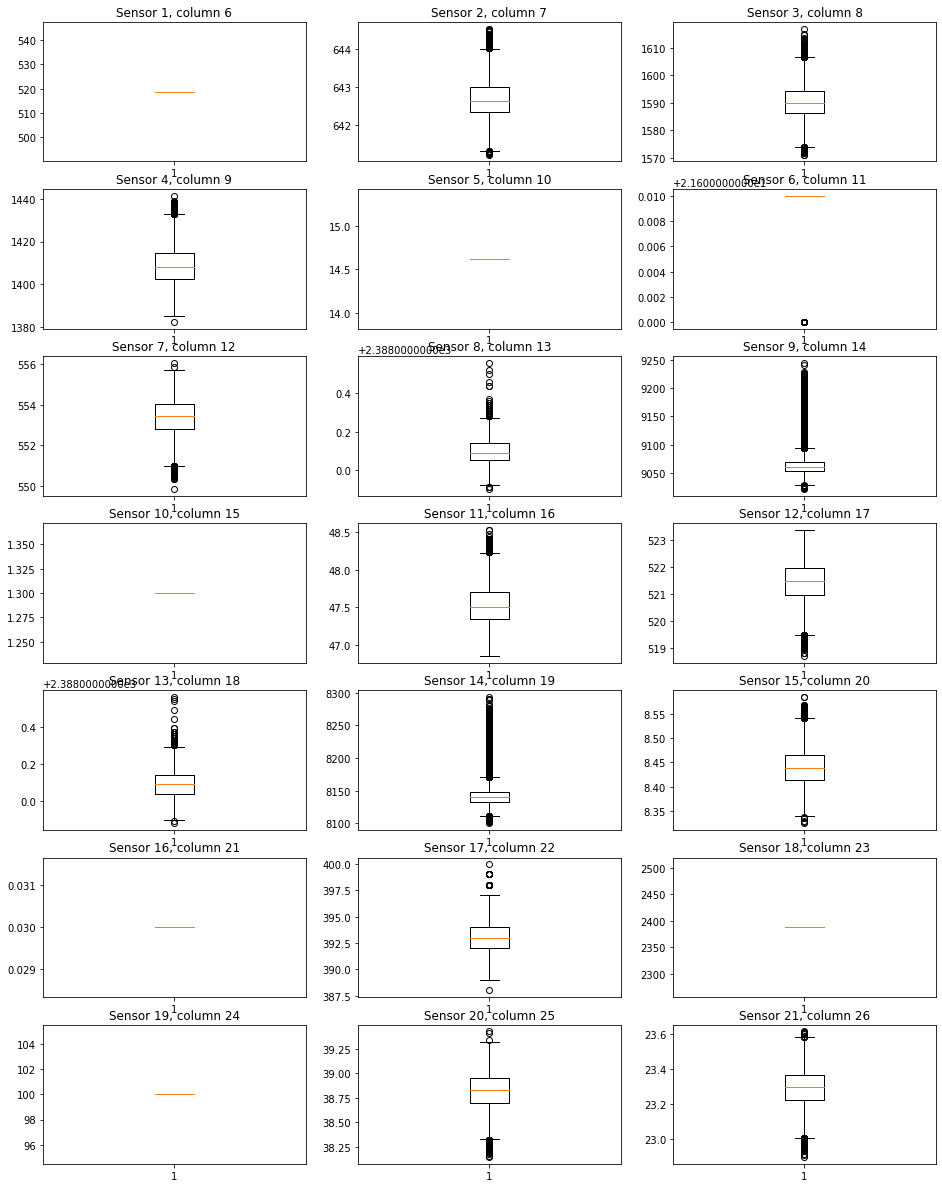

In [23]:
plt.figure(figsize = (16, 21))

for i in range(21):
    sensor_data = train_df.iloc[:,i+5]
    plt.subplot(7,3,i+1)
    plt.boxplot(sensor_data)
    plt.title("Sensor " + str(i+1) + ", column "+ str(i+6))
plt.show()

In [24]:
# Sensors 1, 5, 6, 10, 16, 18 and 19 have constant values hence they are not good for predicting.
#this can be validated using the unique values calculated above

In [25]:
test_df=pd.read_csv("C:/Users/User/Desktop/test_FD001.txt",sep=" ")

In [26]:
test_df.head()

,1,1.1,0.0023,0.0003,100.0,518.67,643.02,1585.29,1398.21,14.62,...,8125.55,8.4052,0.03,392,2388,100.00,38.86,23.3735,Unnamed: 26,Unnamed: 27
0,1,2,-0.0027,-0.0003,100.0,518.67,641.71,1588.45,1395.42,14.62,...,8139.62,8.3803,0.03,393,2388,100.0,39.02,23.3916,NaN,NaN
1,1,3,0.0003,0.0001,100.0,518.67,642.46,1586.94,1401.34,14.62,...,8130.10,8.4441,0.03,393,2388,100.0,39.08,23.4166,NaN,NaN
2,1,4,0.0042,0.0000,100.0,518.67,642.44,1584.12,1406.42,14.62,...,8132.90,8.3917,0.03,391,2388,100.0,39.00,23.3737,NaN,NaN
3,1,5,0.0014,0.0000,100.0,518.67,642.51,1587.19,1401.92,14.62,...,8129.54,8.4031,0.03,390,2388,100.0,38.99,23.4130,NaN,NaN
4,1,6,0.0012,0.0003,100.0,518.67,642.11,1579.12,1395.13,14.62,...,8127.46,8.4238,0.03,392,2388,100.0,38.91,23.3467,NaN,NaN


In [27]:
#perform the same operations to test data as well

In [28]:
test_df.shape

(13095, 28)

In [29]:
test_df.drop(columns=['Unnamed: 26','Unnamed: 27'],inplace=True)

In [30]:
test_df.head()

,1,1.1,0.0023,0.0003,100.0,518.67,643.02,1585.29,1398.21,14.62,...,521.72,2388.03,8125.55,8.4052,0.03,392,2388,100.00,38.86,23.3735
0,1,2,-0.0027,-0.0003,100.0,518.67,641.71,1588.45,1395.42,14.62,...,522.16,2388.06,8139.62,8.3803,0.03,393,2388,100.0,39.02,23.3916
1,1,3,0.0003,0.0001,100.0,518.67,642.46,1586.94,1401.34,14.62,...,521.97,2388.03,8130.10,8.4441,0.03,393,2388,100.0,39.08,23.4166
2,1,4,0.0042,0.0000,100.0,518.67,642.44,1584.12,1406.42,14.62,...,521.38,2388.05,8132.90,8.3917,0.03,391,2388,100.0,39.00,23.3737
3,1,5,0.0014,0.0000,100.0,518.67,642.51,1587.19,1401.92,14.62,...,522.15,2388.03,8129.54,8.4031,0.03,390,2388,100.0,38.99,23.4130
4,1,6,0.0012,0.0003,100.0,518.67,642.11,1579.12,1395.13,14.62,...,521.92,2388.08,8127.46,8.4238,0.03,392,2388,100.0,38.91,23.3467


In [31]:
index_col_names=['unit_id','time_cycle']
operat_set_col_names=['oper_set{}'.format(i) for i in range(1,4)]
sensor_measure_col_names=['sm_{}'.format(i) for i in range(1,22)]
all_col=index_col_names+operat_set_col_names+sensor_measure_col_names
print(all_col)

['unit_id', 'time_cycle', 'oper_set1', 'oper_set2', 'oper_set3', 'sm_1', 'sm_2', 'sm_3', 'sm_4', 'sm_5', 'sm_6', 'sm_7', 'sm_8', 'sm_9', 'sm_10', 'sm_11', 'sm_12', 'sm_13', 'sm_14', 'sm_15', 'sm_16', 'sm_17', 'sm_18', 'sm_19', 'sm_20', 'sm_21']


In [32]:
test_df.columns=all_col

In [33]:
test_df.head()

,unit_id,time_cycle,oper_set1,oper_set2,oper_set3,sm_1,sm_2,sm_3,sm_4,sm_5,...,sm_12,sm_13,sm_14,sm_15,sm_16,sm_17,sm_18,sm_19,sm_20,sm_21
0,1,2,-0.0027,-0.0003,100.0,518.67,641.71,1588.45,1395.42,14.62,...,522.16,2388.06,8139.62,8.3803,0.03,393,2388,100.0,39.02,23.3916
1,1,3,0.0003,0.0001,100.0,518.67,642.46,1586.94,1401.34,14.62,...,521.97,2388.03,8130.10,8.4441,0.03,393,2388,100.0,39.08,23.4166
2,1,4,0.0042,0.0000,100.0,518.67,642.44,1584.12,1406.42,14.62,...,521.38,2388.05,8132.90,8.3917,0.03,391,2388,100.0,39.00,23.3737
3,1,5,0.0014,0.0000,100.0,518.67,642.51,1587.19,1401.92,14.62,...,522.15,2388.03,8129.54,8.4031,0.03,390,2388,100.0,38.99,23.4130
4,1,6,0.0012,0.0003,100.0,518.67,642.11,1579.12,1395.13,14.62,...,521.92,2388.08,8127.46,8.4238,0.03,392,2388,100.0,38.91,23.3467


In [34]:
test_df.nunique()

unit_id        100
time_cycle     303
oper_set1      150
oper_set2       14
oper_set3        1
sm_1             1
sm_2           262
sm_3          2361
sm_4          2954
sm_5             1
sm_6             2
sm_7           415
sm_8            41
sm_9          4047
sm_10            1
sm_11          136
sm_12          357
sm_13           43
sm_14         3786
sm_15         1506
sm_16            1
sm_17            9
sm_18            1
sm_19            1
sm_20          103
sm_21         3555
dtype: int64

In [35]:
#we can drop oper_set3, sensors-1,5,6,10,16,18,19 since these contain constant values.

In [36]:
#dropping unnecessary data from train_df and test_df

In [37]:
columns_to_drop=['oper_set3','sm_1','sm_5','sm_6','sm_10','sm_16','sm_18','sm_19']

In [38]:
train_df.drop(columns=columns_to_drop,inplace=True) 


In [39]:
test_df.drop(columns=columns_to_drop,inplace=True)

In [40]:
train_df.describe()

,unit_id,time_cycle,oper_set1,oper_set2,sm_2,sm_3,sm_4,sm_7,sm_8,sm_9,sm_11,sm_12,sm_13,sm_14,sm_15,sm_17,sm_20,sm_21
count,20630.000000,20630.000000,20630.000000,20630.000000,20630.000000,20630.000000,20630.000000,20630.000000,20630.000000,20630.000000,20630.000000,20630.000000,20630.000000,20630.000000,20630.000000,20630.000000,20630.000000,20630.000000
mean,51.509016,108.813088,-0.000009,0.000002,642.680975,1590.523159,1408.934186,553.367663,2388.096653,9065.243864,47.541172,521.413458,2388.096156,8143.752971,8.442147,393.210713,38.816259,23.289699
std,29.226226,68.878570,0.002187,0.000293,0.500029,6.131295,9.000636,0.885087,0.070987,22.083016,0.267093,0.737569,0.071919,19.076605,0.037506,1.548778,0.180743,0.108250
min,1.000000,1.000000,-0.008700,-0.000600,641.210000,1571.040000,1382.250000,549.850000,2387.900000,9021.730000,46.850000,518.690000,2387.880000,8099.940000,8.324900,388.000000,38.140000,22.894200
25%,26.000000,52.000000,-0.001500,-0.000200,642.330000,1586.260000,1402.360000,552.810000,2388.050000,9053.100000,47.350000,520.960000,2388.040000,8133.242500,8.414900,392.000000,38.700000,23.221800
50%,52.000000,104.000000,-0.000000,0.000000,642.640000,1590.100000,1408.040000,553.440000,2388.090000,9060.660000,47.510000,521.480000,2388.090000,8140.540000,8.438950,393.000000,38.830000,23.297900
75%,77.000000,156.000000,0.001500,0.000300,643.000000,1594.380000,1414.557500,554.010000,2388.140000,9069.420000,47.700000,521.950000,2388.140000,8148.310000,8.465600,394.000000,38.950000,23.366800
max,100.000000,362.000000,0.008700,0.000600,644.530000,1616.910000,1441.490000,556.060000,2388.560000,9244.590000,48.530000,523.380000,2388.560000,8293.720000,8.584800,400.000000,39.430000,23.618400


In [41]:
train_df.shape

(20630, 18)

In [42]:
test_df.shape

(13095, 18)

In [43]:
train_df['time_cycle'].max()

362

In [44]:
y_true=pd.read_csv('C:/Users/User/Desktop/RUL_FD001.txt',names=['RUL'])

In [45]:
y_true

,RUL
0,112
1,98
2,69
3,82
4,91
...,...
95,137
96,82
97,59
98,117


In [46]:
y_true['unit_id']=y_true.index+1

In [47]:
y_true

,RUL,unit_id
0,112,1
1,98,2
2,69,3
3,82,4
4,91,5
...,...,...
95,137,96
96,82,97
97,59,98
98,117,99


In [48]:
# We need the target variable in both the train and test sets inorder to perform the machine learning process

In [49]:
# Computing the remaining useful life

In [50]:
max_time_cycle=train_df.groupby('unit_id')['time_cycle'].max()

In [51]:
max_time_cycle

unit_id
1      192
2      287
3      179
4      189
5      269
      ... 
96     336
97     202
98     156
99     185
100    200
Name: time_cycle, Length: 100, dtype: int64

In [52]:
rul = pd.DataFrame(max_time_cycle).reset_index()

In [53]:
rul

,unit_id,time_cycle
0,1,192
1,2,287
2,3,179
3,4,189
4,5,269
...,...,...
95,96,336
96,97,202
97,98,156
98,99,185


In [54]:
rul.rename(columns={'time_cycle': 'max'}, inplace=True)


In [55]:
rul

,unit_id,max
0,1,192
1,2,287
2,3,179
3,4,189
4,5,269
...,...,...
95,96,336
96,97,202
97,98,156
98,99,185


In [56]:
train_df = train_df.merge(rul, on=['unit_id'], how='left')

In [57]:
train_df['RUL'] = train_df['max'] - train_df['time_cycle']

In [58]:
train_df.drop('max', axis=1, inplace=True)

In [59]:
#now including the RUL values provided in the dataset into the test set.

In [60]:
test_df['RUL']=0
for i in range(1,101):
    test_df.loc[test_df.unit_id==i,'RUL']=range(int(y_true.RUL[y_true.unit_id==i])+len(test_df[test_df.unit_id==i])-1,
                                                int(y_true.RUL[y_true.unit_id==i])-1,-1)

In [61]:
test_df.loc[test_df.unit_id==1,'RUL']

0     141
1     140
2     139
3     138
4     137
5     136
6     135
7     134
8     133
9     132
10    131
11    130
12    129
13    128
14    127
15    126
16    125
17    124
18    123
19    122
20    121
21    120
22    119
23    118
24    117
25    116
26    115
27    114
28    113
29    112
Name: RUL, dtype: int64

In [62]:
test_df.loc[test_df.unit_id==1,['unit_id','time_cycle','RUL']]
#the RUL is equal to 112 for the last time cycle of the engine with unit id=1 

,unit_id,time_cycle,RUL
0,1,2,141
1,1,3,140
2,1,4,139
3,1,5,138
4,1,6,137
5,1,7,136
6,1,8,135
7,1,9,134
8,1,10,133
9,1,11,132


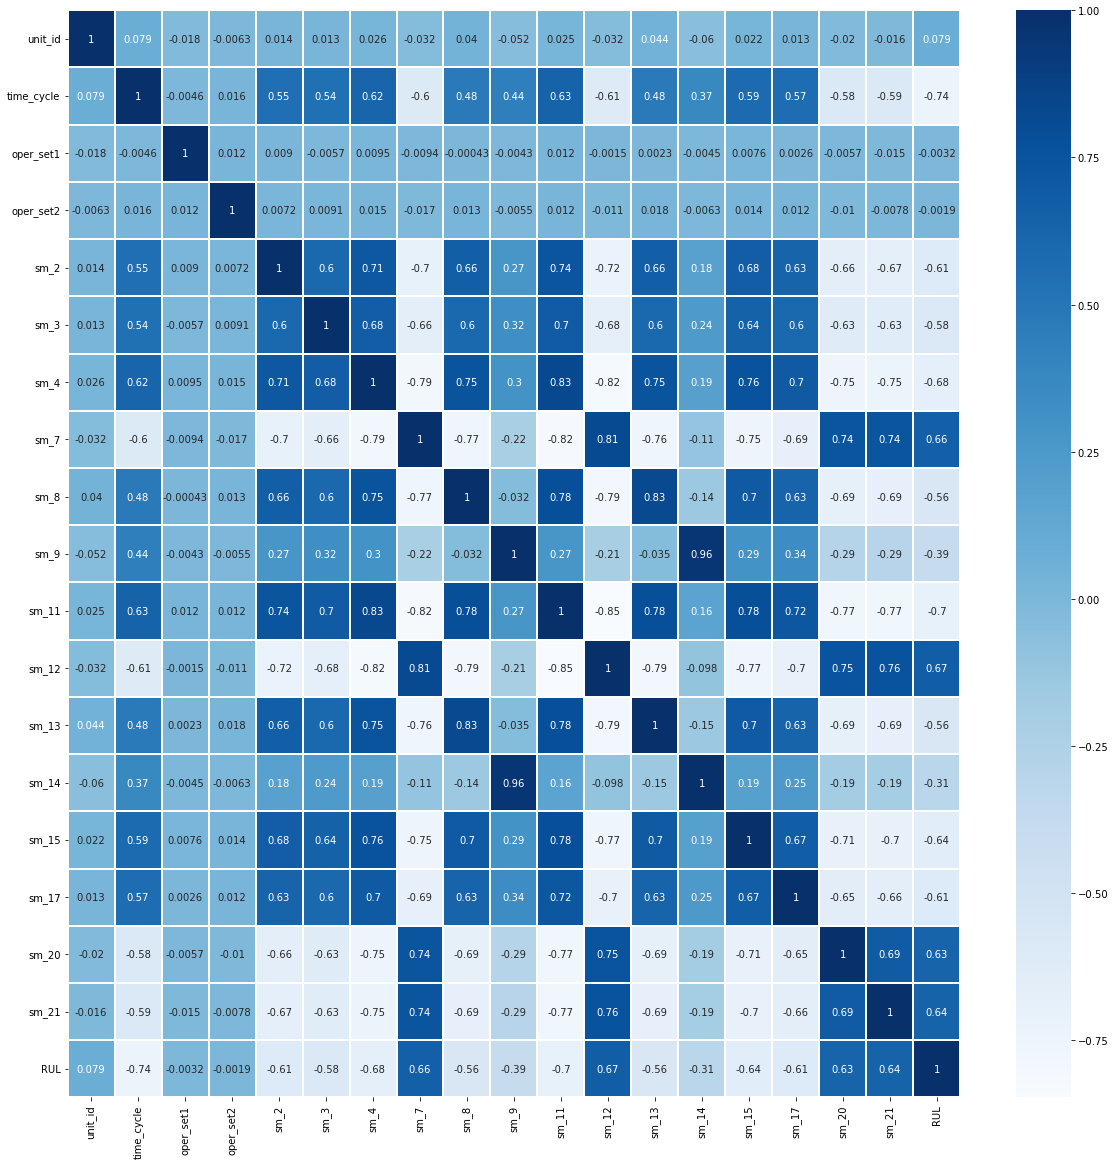

In [63]:
sns.heatmap(train_df.corr(),annot=True,cmap='Blues',linewidths=0.2)
fig=plt.gcf()
fig.set_size_inches(20,20)
plt.show()

In [64]:
# we can Drop one of the highly correlated features and keep the other.note that sm_9 and sm_14 are highly correlated hence we can drop any one of them.

In [74]:
train_df.head()

,unit_id,time_cycle,oper_set1,oper_set2,sm_2,sm_3,sm_4,sm_7,sm_8,sm_9,sm_11,sm_12,sm_13,sm_15,sm_17,sm_20,sm_21,RUL
0,1,-0.994460,0.218391,-0.500000,-0.433735,-0.093961,-0.294733,0.256039,-0.575758,-0.799515,-0.238095,0.530917,-0.441176,-0.177376,-0.333333,0.333333,0.462027,190
1,1,-0.988920,-0.494253,0.500000,-0.313253,-0.260955,-0.258947,0.420290,-0.454545,-0.719914,-0.500000,0.590618,-0.558824,-0.285110,-0.666667,0.255814,0.242751,189
2,1,-0.983380,0.080460,0.000000,-0.313253,-0.487683,-0.337610,0.481481,-0.363636,-0.750965,-0.666667,0.778252,-0.411765,-0.666795,-0.333333,0.147287,0.324772,188
3,1,-0.977839,-0.218391,-0.333333,-0.301205,-0.485066,-0.190749,0.336554,-0.515152,-0.700081,-0.488095,0.492537,-0.529412,-0.195845,-0.166667,0.178295,0.409003,187
4,1,-0.972299,-0.494253,-0.166667,-0.463855,-0.414432,-0.455773,0.552335,-0.636364,-0.749170,-0.630952,0.275053,-0.558824,-0.338977,-0.500000,0.302326,0.305440,186


In [ ]:
train_df

In [66]:
test_df.drop('sm_14',axis=1,inplace=True)

In [75]:
test_df.head()

,unit_id,time_cycle,oper_set1,oper_set2,sm_2,sm_3,sm_4,sm_7,sm_8,sm_9,sm_11,sm_12,sm_13,sm_15,sm_17,sm_20,sm_21,RUL
0,1,2,-0.0027,-0.0003,641.71,1588.45,1395.42,554.85,2388.01,9054.42,47.50,522.16,2388.06,8.3803,393,39.02,23.3916,141
1,1,3,0.0003,0.0001,642.46,1586.94,1401.34,554.11,2388.05,9056.96,47.50,521.97,2388.03,8.4441,393,39.08,23.4166,140
2,1,4,0.0042,0.0000,642.44,1584.12,1406.42,554.07,2388.03,9045.29,47.28,521.38,2388.05,8.3917,391,39.00,23.3737,139
3,1,5,0.0014,0.0000,642.51,1587.19,1401.92,554.16,2388.01,9044.55,47.31,522.15,2388.03,8.4031,390,38.99,23.4130,138
4,1,6,0.0012,0.0003,642.11,1579.12,1395.13,554.22,2388.00,9050.96,47.26,521.92,2388.08,8.4238,392,38.91,23.3467,137


In [68]:
# NORMALIZATION
#to avoid dependency on the choice of the measurement units.
#feature variables have different ranges of values and may reduce the performance of the model.
#we will transform tha data within the range 1 and -1

In [69]:
#this can be achieved using minmaxscaler in the sklearn library

In [76]:
from sklearn.preprocessing import MinMaxScaler
features=list(train_df.columns[1:-1])
min_max_scaler = MinMaxScaler(feature_range=(-1,1))
train_df[features] = min_max_scaler.fit_transform(train_df[features])
test_df[features] = min_max_scaler.fit_transform(test_df[features])
test_df.head()

,unit_id,time_cycle,oper_set1,oper_set2,sm_2,sm_3,sm_4,sm_7,sm_8,sm_9,sm_11,sm_12,sm_13,sm_15,sm_17,sm_20,sm_21,RUL
0,1,-0.993377,-0.3125,-0.538462,-0.634069,0.008050,-0.549520,0.600806,-0.414634,-0.541916,-0.041096,0.269406,-0.209302,-0.544583,0.00,0.290909,0.291437,141
1,1,-0.986755,0.0625,0.076923,-0.160883,-0.070371,-0.307739,0.302419,-0.219512,-0.502989,-0.041096,0.182648,-0.348837,0.067114,0.00,0.400000,0.362208,140
2,1,-0.980132,0.5500,-0.076923,-0.173502,-0.216827,-0.100265,0.286290,-0.317073,-0.681839,-0.342466,-0.086758,-0.255814,-0.435283,-0.50,0.254545,0.240764,139
3,1,-0.973510,0.2000,-0.076923,-0.129338,-0.057388,-0.284051,0.322581,-0.414634,-0.693180,-0.301370,0.264840,-0.348837,-0.325983,-0.75,0.236364,0.352017,138
4,1,-0.966887,0.1750,0.384615,-0.381703,-0.476500,-0.561364,0.346774,-0.463415,-0.594943,-0.369863,0.159817,-0.116279,-0.127517,-0.25,0.090909,0.164331,137


In [77]:
train_df.head()

,unit_id,time_cycle,oper_set1,oper_set2,sm_2,sm_3,sm_4,sm_7,sm_8,sm_9,sm_11,sm_12,sm_13,sm_15,sm_17,sm_20,sm_21,RUL
0,1,-0.994460,0.218391,-0.500000,-0.433735,-0.093961,-0.294733,0.256039,-0.575758,-0.799515,-0.238095,0.530917,-0.441176,-0.177376,-0.333333,0.333333,0.462027,190
1,1,-0.988920,-0.494253,0.500000,-0.313253,-0.260955,-0.258947,0.420290,-0.454545,-0.719914,-0.500000,0.590618,-0.558824,-0.285110,-0.666667,0.255814,0.242751,189
2,1,-0.983380,0.080460,0.000000,-0.313253,-0.487683,-0.337610,0.481481,-0.363636,-0.750965,-0.666667,0.778252,-0.411765,-0.666795,-0.333333,0.147287,0.324772,188
3,1,-0.977839,-0.218391,-0.333333,-0.301205,-0.485066,-0.190749,0.336554,-0.515152,-0.700081,-0.488095,0.492537,-0.529412,-0.195845,-0.166667,0.178295,0.409003,187
4,1,-0.972299,-0.494253,-0.166667,-0.463855,-0.414432,-0.455773,0.552335,-0.636364,-0.749170,-0.630952,0.275053,-0.558824,-0.338977,-0.500000,0.302326,0.305440,186


In [78]:
#splitting the train and test sets into feature and target variables
x_train = train_df.drop(['unit_id','RUL'],axis=1).values
y_train = train_df['RUL'].values
x_test = test_df.drop(['unit_id','RUL'],axis=1).values
y_test = test_df['RUL'].values

In [79]:
print('x_train shape : ',x_train.shape)
print('x_test shape : ',x_test.shape)
print('y_train shape : ',y_train.shape)
print('y_test shape : ',y_test.shape)

x_train shape :  (20630, 16)
x_test shape :  (13095, 16)
y_train shape :  (20630,)
y_test shape :  (13095,)


In [80]:
#implementing the predictive models

# Linear Regression

In [81]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score
from sklearn.metrics import  mean_squared_error,r2_score, mean_absolute_percentage_error
model = LinearRegression()
model.fit(x_train, y_train)

LinearRegression()

In [82]:
y_pred = model.predict(x_test)

In [84]:
y_pred

array([168.48207165, 149.65865123, 161.28478139, ..., -26.43642987,
       -30.53248038, -52.60541781])

In [85]:
# evaluate the performance of the model
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)
mape = mean_absolute_percentage_error(y_test, y_pred)
print("mean squared error : ",mse)
print("Root mean squared error : ",rmse)
print("R2 score : ",r2)
print("mean absolute percentage error : ",mape)

mean squared error :  3025.700820868507
Root mean squared error :  55.00637072983917
R2 score :  0.13020927529142412
mean absolute percentage error :  0.324808216218696


In [89]:
accuracy_score = cross_val_score(model, x_train, y_train, cv=5)
print( model, "has an accuracy score of", round(accuracy_score.mean(), 2) * 100)

LinearRegression() has an accuracy score of 64.0


In [90]:
#round(accuracy_score.mean(), 2) * 100: It calculates the mean of the accuracy_score array and rounds it to two decimal places. Multiplying by 100 gives the accuracy score as a percentage.

# Decision Tree

In [98]:
from sklearn.tree import DecisionTreeRegressor

model2=DecisionTreeRegressor()
model2.fit(x_train, y_train)

DecisionTreeRegressor()

In [99]:
y_pred=model2.predict(x_test)

In [100]:
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)
print("mean squared error : ",mse)
print("Root mean squared error : ",rmse)
print("R2 score : ",r2)

mean squared error :  4700.484612447499
Root mean squared error :  68.56008031243472
R2 score :  -0.3512366752667442


In [101]:
accuracy_score = cross_val_score(model2, x_train, y_train, cv=5)
print( model2, "has an accuracy score of", round(accuracy_score.mean(), 2) * 100)

DecisionTreeRegressor() has an accuracy score of 38.0


# Random Forest

In [102]:
from sklearn.ensemble import RandomForestRegressor

model3=RandomForestRegressor()
model3.fit(x_train, y_train)

RandomForestRegressor()

In [103]:
y_pred=model3.predict(x_test)

In [104]:
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)
print("mean squared error : ",mse)
print("Root mean squared error : ",rmse)
print("R2 score : ",r2)

mean squared error :  2979.5128416113025
Root mean squared error :  54.58491404785119
R2 score :  0.14348681934795016


In [105]:
accuracy_score = cross_val_score(model3, x_train, y_train, cv=5)
print( model3, "has an accuracy score of", round(accuracy_score.mean(), 2) * 100)

RandomForestRegressor() has an accuracy score of 69.0


# KNN

In [114]:
from sklearn.neighbors import KNeighborsRegressor
model4=KNeighborsRegressor()
model4.fit(x_train,y_train)

KNeighborsRegressor()

In [115]:
y_pred=model4.predict(x_test)

In [116]:
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)
print("mean squared error : ",mse)
print("Root mean squared error : ",rmse)
print("R2 score : ",r2)

mean squared error :  3464.5363940435277
Root mean squared error :  58.860312554755666
R2 score :  0.004058299429163581


In [117]:
accuracy_score = cross_val_score(model4, x_train, y_train, cv=5)
print( model4, "has an accuracy score of", round(accuracy_score.mean(), 2) * 100)

KNeighborsRegressor() has an accuracy score of 63.0


# Gradient Boost

In [118]:
from sklearn.ensemble import GradientBoostingRegressor
model5 = GradientBoostingRegressor(max_features='sqrt',n_estimators=1000,random_state=42)
model5.fit(x_train, y_train)

GradientBoostingRegressor(max_features='sqrt', n_estimators=1000,
                          random_state=42)

In [119]:
y_pred_train=model5.predict(x_train)
print('training RMSE: ',np.sqrt(mean_squared_error(y_train, y_pred_train)))

training RMSE:  31.68462295682572


In [120]:
y_pred_test=model5.predict(x_test)
print('testing RMSE: ',np.sqrt(mean_squared_error(y_test, y_pred_test)))

testing RMSE:  64.59557313996085


In [122]:
accuracy_score = cross_val_score(model5, x_train, y_train, cv=5)
print( model5, "has an accuracy score of", round(accuracy_score.mean(), 2) * 100)

GradientBoostingRegressor(max_features='sqrt', n_estimators=1000,
                          random_state=42) has an accuracy score of 69.0


In [126]:
X = pd.concat([pd.DataFrame(x_train),pd.DataFrame(x_test)]).values
y = pd.concat([pd.DataFrame(y_train),pd.DataFrame(y_test)]).values.ravel()
from sklearn.model_selection import KFold

gb = GradientBoostingRegressor(random_state=42)
cv = KFold(n_splits=5, random_state=0,shuffle=True)
scores={'RMSE':[]}

for train_index, test_index in cv.split(X, y.ravel()):
        xtrain, xtest = X[train_index], X[test_index]
        ytrain, ytest = y[train_index], y[test_index]
        gb.fit(xtrain, ytrain)
        pred = gb.predict(xtest)
        scores['RMSE'].append(np.sqrt(mean_squared_error(ytest, pred)))
        
print('RMSE of the 5 splits: {}'.format(scores['RMSE']))        
print('average RMSE: {}'.format(np.mean(scores['RMSE'])))  

RMSE of the 5 splits: [38.543482300005955, 38.12583208365214, 38.68872566773995, 38.62248380129261, 38.89854319043206]
average RMSE: 38.57581340862455


In [127]:
#the average RMSE 38.57 is better than the RMSE 64.59.
# hence by dividing the dataset into training and testing more times we can achieve better performance for the model.

In [128]:
# Evaluating the feature importances
#these are scores that represent how each feature variable contributes to the model.

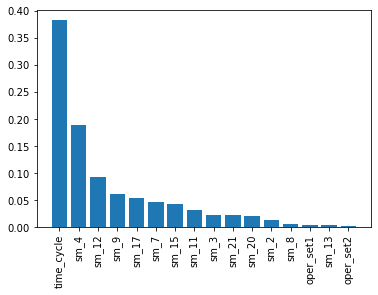

In [129]:
importances = model5.feature_importances_
sorted_index=np.argsort(importances)[::-1]
x=range(len(importances))
labels=np.array(train_df.drop(['unit_id','RUL'],axis=1).columns)[sorted_index]

plt.bar(x,importances[sorted_index],tick_label=labels)

plt.xticks(rotation=90)
plt.show()

In [130]:
# Time_cycle is the feature that contributes most to the model
# performance of the model can be further enhanced if the least important oper_set1 and oper_set2 are avoided.